In [15]:
! pip install rfpimp
! pip install eli5

  Stored in directory: /root/.cache/pip/wheels/c7/35/67/4065afd69df4c0be693ecdec8a9c1433a23f80ee60395272ba
Successfully built rfpimp
     |████████████████████████████████| 102kB 5.5MB/s 


In [1]:
!pip install kaggle

In [7]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {"username":"ygeszvain","key":"dd372cdf797a4dd2ce42075be6ec8b83"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [11]:
!kaggle config set -n path -v/content

- path is now set to: /content


In [12]:
!kaggle datasets download -d residentmario/ramen-ratings

  0% 0.00/39.8k [00:00<?, ?B/s]
100% 39.8k/39.8k [00:00<00:00, 16.2MB/s]


In [13]:
!unzip datasets/residentmario/ramen-ratings/ramen-ratings.zip

Archive:  datasets/residentmario/ramen-ratings/ramen-ratings.zip
  inflating: ramen-ratings.csv       


In [0]:
import pandas as pd
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np  # arrays and math functions
# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from scipy.stats import uniform  # for training-and-test split


sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})
matplotlib.rcParams['figure.figsize'] = (15, 10)

In [192]:
data = pd.read_csv('ramen-ratings.csv')
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [193]:
# Label encoding

lb_make = LabelEncoder()
data["Variety_code"] = lb_make.fit_transform(data["Variety"].astype(str))
data[["Variety", "Variety_code"]].head(11)

,Variety,Variety_code
0,T's Restaurant Tantanmen,2189
1,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,1443
2,Cup Noodles Chicken Vegetable,454
3,GGE Ramen Snack Tomato Flavor,709
4,Singapore Curry,1954
5,Kimchi song Song Ramen,1108
6,Spice Deli Tantan Men With Cilantro,2053
7,Nabeyaki Kitsune Udon,1370
8,Hokkaido Soy Sauce Ramen,811
9,The Original Spicy Stir-Fried Noodles,2229


In [194]:
# Label encoding

lb_make = LabelEncoder()
data["Brand_code"] = lb_make.fit_transform(data["Brand"].astype(str))
data[["Brand", "Brand_code"]].head(11)

,Brand,Brand_code
0,New Touch,190
1,Just Way,119
2,Nissin,192
3,Wei Lih,336
4,Ching's Secret,38
5,Samyang Foods,249
6,Acecook,7
7,Ikeda Shoku,109
8,Ripe'n'Dry,233
9,KOKA,120


In [195]:
# Label encoding

lb_make = LabelEncoder()
data["Style_code"] = lb_make.fit_transform(data["Style"].astype(str))
data[["Style", "Style_code"]].head(11)

,Style,Style_code
0,Cup,4
1,Pack,5
2,Cup,4
3,Pack,5
4,Pack,5
5,Pack,5
6,Cup,4
7,Tray,6
8,Pack,5
9,Pack,5


In [196]:
# Label encoding

lb_make = LabelEncoder()
data["Country_code"] = lb_make.fit_transform(data["Country"].astype(str))
data[["Country", "Country_code"]].head(11)

,Country,Country_code
0,Japan,18
1,Taiwan,32
2,USA,35
3,Taiwan,32
4,India,16
5,South Korea,30
6,Japan,18
7,Japan,18
8,Japan,18
9,Singapore,29


In [197]:
pandas_profiling.ProfileReport(data)

Number of variables,11
Number of observations,2580
Total Missing (%),9.0%
Total size in memory,221.8 KiB
Average record size in memory,88.0 B
Numeric,5
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [0]:
# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

In [0]:
data = data.rename(index=str, columns={"Stars": "target"})

In [0]:
data.target = data.target.replace('Unrated', '')

In [201]:
data.target = data.target.convert_objects(convert_numeric=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [202]:
data.dtypes

Review #          int64
Brand            object
Variety          object
Style            object
Country          object
target          float64
Top Ten          object
Variety_code      int64
Brand_code        int64
Style_code        int64
Country_code      int64
dtype: object

In [204]:
d = {
    'feature_names':['Brand_code','Style_code','Country_code', 'Variety_code']}
 
feature_names = pd.DataFrame(d,columns=['feature_names'])
feature_names

,feature_names
0,Brand_code
1,Style_code
2,Country_code
3,Variety_code


In [0]:
data = data[['Brand_code','Style_code','Country_code','Variety_code','target']]

In [0]:
y = data[["target"]]
X = pd.DataFrame(data, columns = feature_names.feature_names)
np.random.seed(seed = 42)
X['random'] = np.random.random(size = len(X))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

Text(0.5, 1.0, 'Correlation matrix')

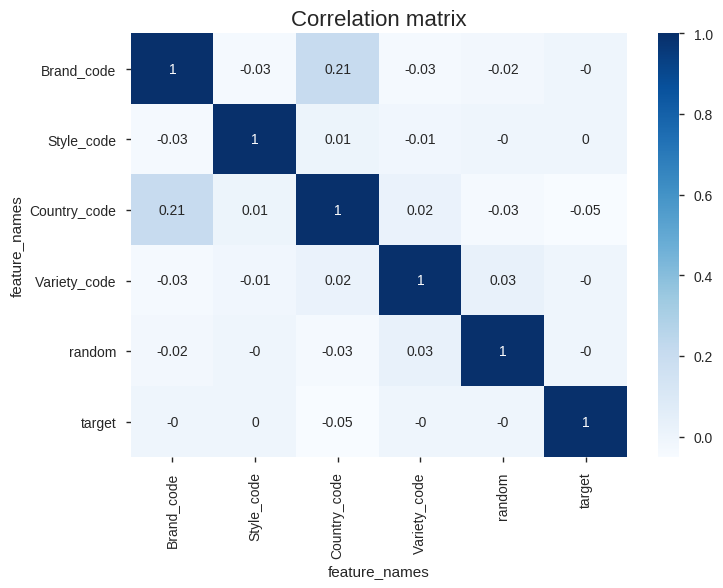

In [207]:
sns.heatmap(X.assign(target = y).corr().round(2), cmap = 'Blues', annot = True).set_title('Correlation matrix', fontsize = 16)

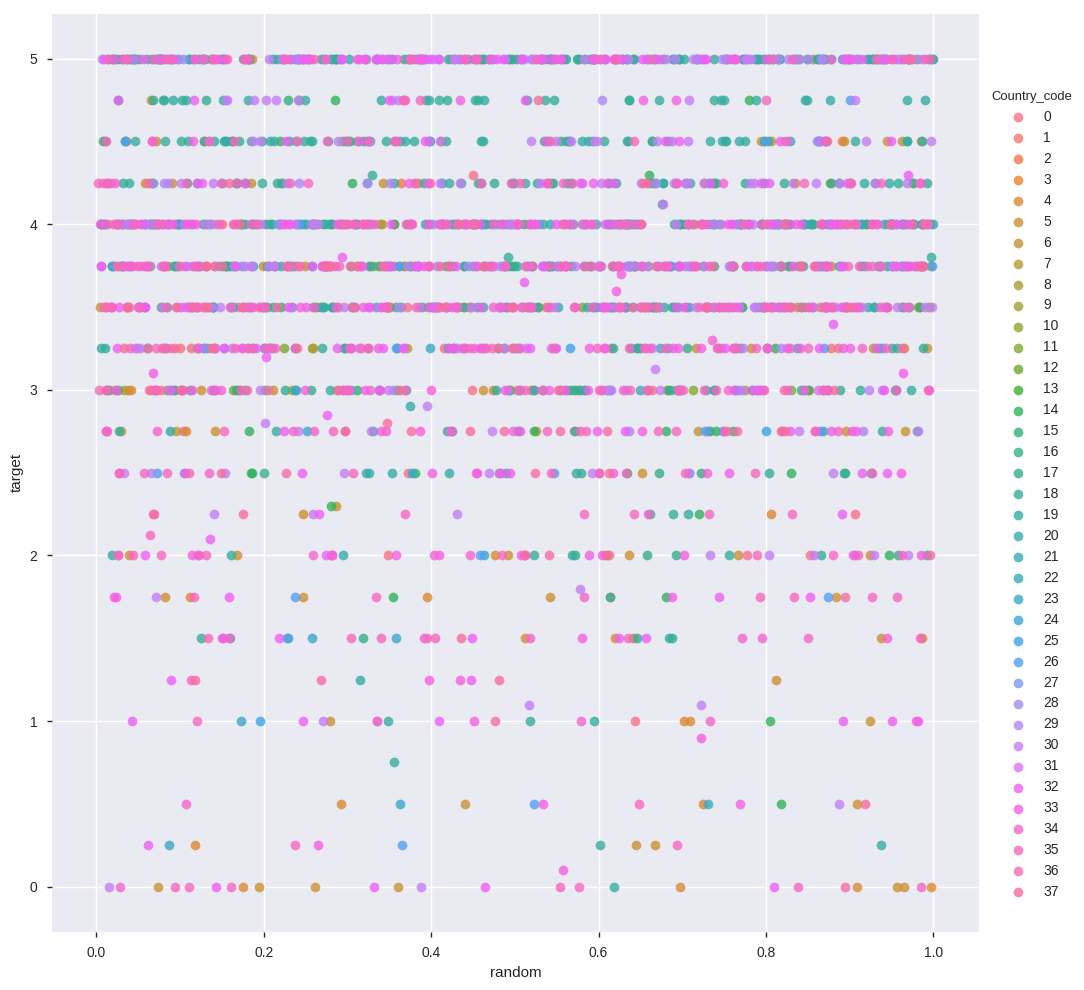

In [208]:

sns.lmplot(x='random', y='target', data=X.assign(target = y),
           fit_reg=False, # No regression line
           hue='Country_code', # Color by Country_code
           height=10)   

In [0]:
data['target'] = data['target'].fillna(data['target'].mode())

In [209]:
# replace NaN with 0
X_train = X_train.fillna(0)
np.any(np.isnan(X_train))
# replace NaN with 0
y_train = y_train.fillna(0)
np.any(np.isnan(y_train))

False

In [210]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                      oob_score=True, random_state=42, verbose=0,
                      warm_start=False)

In [211]:
# replace NaN with 0
X_test = X_test.fillna(0)
np.any(np.isnan(X_test))

# replace NaN with 0
y_test = y_test.fillna(0)
np.any(np.isnan(y_test))

False

In [212]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train, y_train), 
                                                                                    rf.oob_score_,
                                                                                    rf.score(X_test, y_test)))

R^2 Training Score: 0.86 
OOB Score: 0.03 
R^2 Validation Score: -0.02


In [213]:
base_imp = imp_df(X_train.columns, rf.feature_importances_)
base_imp

,feature,feature_importance
0,random,0.291382
1,Variety_code,0.265421
2,Brand_code,0.213880
3,Country_code,0.179315
4,Style_code,0.050002


In [215]:
!pip install google_images_download

     |████████████████████████████████| 911kB 1.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [218]:
data = pd.read_csv('ramen-ratings.csv')
data.Brand.unique()

array(['New Touch', 'Just Way', 'Nissin', 'Wei Lih', "Ching's Secret",
       'Samyang Foods', 'Acecook', 'Ikeda Shoku', "Ripe'n'Dry", 'KOKA',
       'Tao Kae Noi', 'Yamachan', 'Nongshim', 'TRDP', 'Binh Tay', 'Paldo',
       'Jackpot Teriyaki', 'Yum-Mie', 'MyKuali', 'Ottogi',
       'Sichuan Guangyou', 'Lipton', 'Lele', 'Fujiwara', 'Uni-President',
       'Maruchan', 'Prima', 'Sokensha', 'Takamori', 'Guava Story',
       'Samurai Ramen', 'Ogasawara', 'Pringles', "Mom's Dry Noodle",
       'Maggi', 'Indomie', 'Happy Cook', 'The Ramen Rater Select', 'TTL',
       'E-Zee', 'Kiki Noodle', 'Tokyo Noodle', 'GGE', 'Myojo', 'Sau Tao',
       'Wang', 'Daifuku', 'Master Kong', "World O' Noodle", 'Kang Shi Fu',
       'Mum Ngon', 'Fashion Food', 'Dream Kitchen', 'Ajinatori',
       "Dr. McDougall's", 'Ve Wong', 'Super Bihun', 'Xiuhe',
       'Little Cook', 'Shirakiku', "Mama Pat's", 'Goku-Uma',
       'Sichuan Baijia', 'Liang Cheng Mai', 'Gefen', 'Hua Feng',
       'Pulmuone', 'Liu Quan', 'Daikok

In [221]:
# importing google_images_download module 
from google_images_download import google_images_download 

# creating object 
response = google_images_download.googleimagesdownload() 

search_queries =[ 
'New Touch ramen', 'Just Wa ramen', 'Nissin ramen', 'Wei Lih ramen', "Ching's Secret",
       'Samyang Foods ramen', 'Acecook ramen', 'Ikeda Shoku ramen', "Ripe'n'Dry", 'KOKA ramen',
       'Tao Kae Noi ramen', 'Yamachan ramen', 'Nongshim ramen', 'TRDP ramen', 'Binh Tay ramen', 'Paldo ramen',
       'Jackpot Teriyaki ramen', 'Yum-Mie ramen', 'MyKuali ramen', 'Ottogi ramen',
       'Sichuan Guangyou ramen', 'Lipton ramen', 'Lele ramen', 'Fujiwara ramen', 'Uni-President ramen',
       'Maruchan ramen', 'Prima ramen', 'Sokensha ramen', 'Takamori ramen', 'Guava Story ramen',
       'Samurai Ramen ramen', 'Ogasawara ramen', 'Pringles ramen', "Mom's Dry Noodle",
       'Maggi ramen', 'Indomie ramen', 'Happy Cook ramen', 'The Ramen Rater Select ramen', 'TTL ramen',
       'E-Zee ramen', 'Kiki Noodle ramen', 'Tokyo Noodle ramen', 'GGE ramen', 'Myojo ramen', 'Sau Tao ramen',
       'Wang ramen', 'Daifuku ramen', 'Master Kong ramen', "World O' Noodle", 'Kang Shi Fu ramen',
       'Mum Ngon ramen', 'Fashion Food ramen', 'Dream Kitchen ramen', 'Ajinatori ramen',
       "Dr. McDougall's", 'Ve Wong ramen', 'Super Bihun ramen', 'Xiuhe ramen',
       'Little Cook ramen', 'Shirakiku ramen', "Mama Pat's", 'Goku-Uma ramen',
       'Sichuan Baijia ramen', 'Liang Cheng Mai ramen', 'Gefen ramen', 'Hua Feng ramen',
       'Pulmuone ramen', 'Liu Quan ramen', 'Daikoku ramen', 'Chuan Wei Wang ramen', 'Wai Wai ramen',
       'Kamfen ramen', 'Marutai ramen', 'Vifon ramen', '1 To 3 Noodles ramen', 'Fantastic ramen',
       'Knorr ramen', 'Sempio ramen', 'Patanjali ramen', 'Qin Zong ramen', 'Pran ramen',
       'Sapporo Ichiban ramen', 'MAMA ramen', 'Xiao Ban Mian ramen', 'Suimin ramen', 'Cintan ramen',
       'JML ramen', 'Unif Tung-I ramen', 'Tablemark ramen', "Farmer's Heart", 'Fuku ramen',
       'Singa-Me ramen', 'Love Cook ramen', 'Great Value ramen', 'Asian Thai Foods ramen',
       'Nagatanien ramen', 'Nyor Nyar ramen', 'Tseng Noodles ramen', 'A-Sha Dry Noodle ramen',
       'Morre ramen', 'Roland ramen', "Mr. Lee's Noodles", 'Choumama ramen',
       'President Rice ramen', 'Happy Family ramen', 'Menraku ramen', 'La Moderna ramen',
       'Jingqi ramen', 'Thien Houng Foods ramen', 'Doll ramen', 'Four Seas ramen', 'CarJEN ramen',
       '7 Select ramen', 'Oni Hot Pot ramen', 'Weh Lih ramen', 'Itomen ramen', 'Sanpo ramen',
       'Mi Sedaap ramen', 'Tokushima Seifun ramen', 'Mamee ramen', 'Zow Zow ramen', 'Koyo ramen',
       'ORee Garden ramen', 'A1 ramen', 'Migawon ramen', "Chaudhary's Wai Wai",
       'Urban Noodle ramen', 'Trident ramen', 'Conimex ramen', 'Prima Taste ramen', 'MyOri ramen',
       'Itsuki ramen', 'Kabuto Noodles ramen', 'IbuRamen ramen', 'Koh Thai ramen', 'Bamee ramen',
       'Ibumie ramen', 'Unox ramen', 'Fortune ramen', 'Bonasia ramen', 'Mie Sedaap ramen', 'iMee ramen',
       'Thai Smile ramen', 'Asia Gold ramen', 'Pirkka ramen', 'Higashimaru ramen', 'Kuriki ramen',
       'Vedan ramen', 'Yum Yum ramen', 'Mama ramen', 'Baijia ramen', 'Daraz ramen', 'Pama ramen', 'Seven & I ramen',
       'Forest Noodles ramen', "Vit's", 'Ten-In ramen', 'Sugakiya Foods ramen', 'Hao Way ramen',
       'Nakaya Shouten ramen', 'Thai Chef ramen', 'Crystal Noodle ramen', 'Azami ramen', 'Super ramen',
       'Torishi ramen', 'Western Family ramen', 'Chering Chang ramen', 'Ishimaru ramen',
       'Authentically Asian ramen', 'Aroi ramen', 'Koka ramen', 'Wu-Mu ramen', 'Yamadai ramen',
       'Vina Acecook ramen', 'Baixiang Noodles ramen', 'Salam Mie ramen', 'Lee Fah Mee ramen',
       'Sakurai Foods ramen', 'The Kitchen Food ramen', 'Premiere ramen', '7 Select/Nissin ramen',
       'Wugudaochang ramen', 'Emart ramen', 'Lishan Food Manufacturing ramen', 'Ah Lai ramen',
       'Tropicana Slim ramen', 'A-One ramen', 'Deshome ramen', 'Paldo Vina ramen', 'Chencun ramen',
       'United ramen', 'ChoripDong ramen', 'Shan ramen', 'Ruski ramen', 'No Name ramen', 'New Way ramen',
       'Lucky Me! ramen', "Campbell's", 'One Dish Asia ramen', 'Long Jun Hang ramen',
       'Unif-100 ramen', 'Hankow ramen', 'The Bridge ramen', 'Mitoku ramen', 'Unzen ramen', 'Uncle Sun ramen',
       'Mi E-Zee ramen', 'E-mi ramen', 'J.J. ramen', 'Curry Prince ramen', 'Econsave ramen', 'Oyatsu ramen',
       'Kin-Dee ramen', 'Ko-Lee ramen', 'ICA ramen', 'Nanyang Chef ramen', 'Thai Pavilion ramen',
       'Miliket ramen', 'Katoz ramen', 'Men-Sunaoshi ramen', 'Chewy ramen', 'Adabi ramen',
       'Osaka Ramen ramen', "Sainsbury's", 'Pamana ramen', "Annie Chun's", 'La Fonte ramen',
       'Thai Choice ramen', 'Tesco ramen', 'Pop Bihun ramen', 'Snapdragon ramen', 'Saji ramen',
       'Miracle Noodle ramen', 'Tiger Tiger ramen', 'Takamori Kosan ramen', 'Papa ramen',
       'Sawadee ramen', 'Golden Wheat ramen', 'Lotus Foods ramen', 'Plats Du Chef ramen',
       'Batchelors ramen', 'Sakura Noodle ramen', 'Unif ramen', 'Hi-Myon ramen', 'Healtimie ramen',
       'Thai Kitchen ramen', 'Mr. Noodles ramen', 'Good Tto Leu Foods ramen', 'GaGa ramen',
       'Kimura ramen', 'Tokachimen Koubou ramen', 'ABC ramen', 'Eat & Go ramen', 'President ramen',
       'SuperMi ramen', 'Kumamoto ramen', 'HoMyeonDang ramen', 'Nan Jie Cun ramen', 'China Best ramen',
       'Sanrio ramen', 'Peyang ramen', 'Golden Wonder ramen', 'Komforte Chockolates ramen',
       'Nagao Noodle ramen', 'Maitri ramen', 'GS25 ramen', 'Baltix ramen', 'Amianda ramen',
       'Tasty Bite ramen', 'Star Anise Foods ramen', 'Tradition ramen', 'Amino ramen',
       'Pot Noodle ramen', 'Sun Noodle ramen', 'S&S ramen', 'Springlife ramen', 'Right Foods ramen',
       'Sunlee ramen', 'Goku Uma ramen', 'Daddy ramen', "Han's South Korea", 'Sarimi ramen',
       'FMF ramen', 'Long Kow ramen', 'Unif / Tung-I ramen', 'Song Hak ramen', 'Fuji Mengyo ramen',
       'Dragonfly ramen', 'CJ CheilJedang ramen', 'Dongwon ramen', 'Seven-Eleven ramen', 'Souper ramen',
       "Kim's Bowl", 'Ohsung ramen', 'Gau Do ramen', 'Golden Mie ramen', 'GreeNoodle ramen',
       'Kailo ramen', 'Fashion Foods ramen', 'Hosoonyi ramen', 'Payless ramen', 'Yamamoto ramen',
       'Saigon Ve Wong ramen', 'Wu Mu ramen', 'Mee Jang ramen', 'JFC ramen', 'Samyang ramen',
       'Mug Shot ramen', 'Lishan ramen', 'Cap Atoom Bulan ramen', 'Sura ramen', 'Wei Chuan ramen',
       'Yamamori ramen', 'Mr. Udon ramen', 'Omachi ramen', 'Wei Wei ramen', 'Six Fortune ramen',
       'Haioreum ramen', 'Sunlight ramen', 'Noah Foods ramen', 'O Sung ramen', 'Foodmon ramen',
       'Sahmyook ramen', 'Nan Hsing ramen', 'Mexi-Ramen ramen', 'Hsin Tung Yang ramen', 'Sao Tao ramen',
       'iNoodle ramen', 'Quickchow ramen', 'Chikara ramen', 'Q ramen', 'Noodle Time ramen', 'Gomex ramen',
       'US Canning ramen', 'Rhee Bros Assi ramen', 'Bon Go Jang ramen', 'Tayho ramen',
       'Sunny Maid ramen', 'Royal Umbrella ramen', 'Tiger ramen',
       'Fu Chang Chinese Noodle Company ramen', 'Sanyo Foods ramen', 'Rocket Brand ramen',
       'Boss ramen', 'Chorip Dong ramen', 'Higashi ramen', 'Sakurai ramen', 'Global Inspiration ramen',
       'Teriyaki Time ramen', 'Hua Feng Noodle Expert ramen', 'Kim Ve Wong ramen', 'Smack ramen',
       'Sutah ramen', 'Tung-I ramen', 'Westbrae ramen'
] 


def downloadimages(query): 
	# keywords is the search query 
	# format is the image file format 
	# limit is the number of images to be downloaded 
	# print urs is to print the image file url 
	# size is the image size which can 
	# be specified manually ("large, medium, icon") 
	# aspect ratio denotes the height width ratio 
	# of images to download. ("tall, square, wide, panoramic")
	arguments = {"keywords": query, "format": "jpg", "limit":10, "print_urls":True}
	try: 
		response.download(arguments) 
	
	# Handling File NotFound Error	 
	except FileNotFoundError: 
		arguments = {"keywords": query, 
					"format": "jpg", 
					"limit":10, 
					"print_urls":True} 
					
		# Providing arguments for the searched query 
		try: 
			# Downloading the photos based 
			# on the given arguments 
			response.download(arguments) 
		except: 
			pass

# Driver Code 
for query in search_queries: 
	downloadimages(query) 
	print() 




Item no.: 1 --> Item name = New Touch ramen
Evaluating...
Starting Download...
Image URL: https://www.theramenrater.com/wp-content/uploads/2017/05/2017_5_30_2546_001.jpg
Completed Image ====> 1.2017_5_30_2546_001.jpg
Image URL: https://www.theramenrater.com/wp-content/uploads/2017/11/2017_11_28_2725_001.jpg
Completed Image ====> 2.2017_11_28_2725_001.jpg
Image URL: https://www.theramenrater.com/wp-content/uploads/2019/03/2019_3_15_3220_001.jpg
Completed Image ====> 3.2019_3_15_3220_001.jpg
Image URL: https://i.pinimg.com/originals/e3/96/b7/e396b7ada30a3e25d35d240a0a077629.jpg
Completed Image ====> 4.e396b7ada30a3e25d35d240a0a077629.jpg
Image URL: https://www.theramenrater.com/wp-content/uploads/2016/10/2016_10_10_2252_001.jpg
Completed Image ====> 5.2016_10_10_2252_001.jpg
Image URL: https://japee.tokyo/wp-content/uploads/2019/01/4903088011912.jpg
Completed Image ====> 6.4903088011912.jpg
Image URL: https://www.theramenrater.com/wp-content/uploads/2019/03/2019_3_18_3223_001.jpg
Comple

In [0]:
from fastai.vision import *

In [0]:
path = Path('/downloads/')

In [0]:
for folder in ('New Touch ramen', 'Just Wa ramen', 'Nissin ramen', 'Wei Lih ramen', "Ching's Secret",
       'Samyang Foods ramen', 'Acecook ramen', 'Ikeda Shoku ramen', "Ripe'n'Dry", 'KOKA ramen',
       'Tao Kae Noi ramen', 'Yamachan ramen', 'Nongshim ramen', 'TRDP ramen', 'Binh Tay ramen', 'Paldo ramen',
       'Jackpot Teriyaki ramen', 'Yum-Mie ramen', 'MyKuali ramen', 'Ottogi ramen',
       'Sichuan Guangyou ramen', 'Lipton ramen', 'Lele ramen', 'Fujiwara ramen', 'Uni-President ramen',
       'Maruchan ramen', 'Prima ramen', 'Sokensha ramen', 'Takamori ramen', 'Guava Story ramen',
       'Samurai Ramen ramen', 'Ogasawara ramen', 'Pringles ramen', "Mom's Dry Noodle",
       'Maggi ramen', 'Indomie ramen', 'Happy Cook ramen', 'The Ramen Rater Select ramen', 'TTL ramen',
       'E-Zee ramen', 'Kiki Noodle ramen', 'Tokyo Noodle ramen', 'GGE ramen', 'Myojo ramen', 'Sau Tao ramen',
       'Wang ramen', 'Daifuku ramen', 'Master Kong ramen', "World O' Noodle", 'Kang Shi Fu ramen',
       'Mum Ngon ramen', 'Fashion Food ramen', 'Dream Kitchen ramen', 'Ajinatori ramen',
       "Dr. McDougall's", 'Ve Wong ramen', 'Super Bihun ramen', 'Xiuhe ramen',
       'Little Cook ramen', 'Shirakiku ramen', "Mama Pat's", 'Goku-Uma ramen',
       'Sichuan Baijia ramen', 'Liang Cheng Mai ramen', 'Gefen ramen', 'Hua Feng ramen',
       'Pulmuone ramen', 'Liu Quan ramen', 'Daikoku ramen', 'Chuan Wei Wang ramen', 'Wai Wai ramen',
       'Kamfen ramen', 'Marutai ramen', 'Vifon ramen', '1 To 3 Noodles ramen', 'Fantastic ramen',
       'Knorr ramen', 'Sempio ramen', 'Patanjali ramen', 'Qin Zong ramen', 'Pran ramen',
       'Sapporo Ichiban ramen', 'MAMA ramen', 'Xiao Ban Mian ramen', 'Suimin ramen', 'Cintan ramen',
       'JML ramen', 'Unif Tung-I ramen', 'Tablemark ramen', "Farmer's Heart", 'Fuku ramen',
       'Singa-Me ramen', 'Love Cook ramen', 'Great Value ramen', 'Asian Thai Foods ramen',
       'Nagatanien ramen', 'Nyor Nyar ramen', 'Tseng Noodles ramen', 'A-Sha Dry Noodle ramen',
       'Morre ramen', 'Roland ramen', "Mr. Lee's Noodles", 'Choumama ramen',
       'President Rice ramen', 'Happy Family ramen', 'Menraku ramen', 'La Moderna ramen',
       'Jingqi ramen', 'Thien Houng Foods ramen', 'Doll ramen', 'Four Seas ramen', 'CarJEN ramen',
       '7 Select ramen', 'Oni Hot Pot ramen', 'Weh Lih ramen', 'Itomen ramen', 'Sanpo ramen',
       'Mi Sedaap ramen', 'Tokushima Seifun ramen', 'Mamee ramen', 'Zow Zow ramen', 'Koyo ramen',
       'ORee Garden ramen', 'A1 ramen', 'Migawon ramen', "Chaudhary's Wai Wai",
       'Urban Noodle ramen', 'Trident ramen', 'Conimex ramen', 'Prima Taste ramen', 'MyOri ramen',
       'Itsuki ramen', 'Kabuto Noodles ramen', 'IbuRamen ramen', 'Koh Thai ramen', 'Bamee ramen',
       'Ibumie ramen', 'Unox ramen', 'Fortune ramen', 'Bonasia ramen', 'Mie Sedaap ramen', 'iMee ramen',
       'Thai Smile ramen', 'Asia Gold ramen', 'Pirkka ramen', 'Higashimaru ramen', 'Kuriki ramen',
       'Vedan ramen', 'Yum Yum ramen', 'Mama ramen', 'Baijia ramen', 'Daraz ramen', 'Pama ramen', 'Seven & I ramen',
       'Forest Noodles ramen', "Vit's", 'Ten-In ramen', 'Sugakiya Foods ramen', 'Hao Way ramen',
       'Nakaya Shouten ramen', 'Thai Chef ramen', 'Crystal Noodle ramen', 'Azami ramen', 'Super ramen',
       'Torishi ramen', 'Western Family ramen', 'Chering Chang ramen', 'Ishimaru ramen',
       'Authentically Asian ramen', 'Aroi ramen', 'Koka ramen', 'Wu-Mu ramen', 'Yamadai ramen',
       'Vina Acecook ramen', 'Baixiang Noodles ramen', 'Salam Mie ramen', 'Lee Fah Mee ramen',
       'Sakurai Foods ramen', 'The Kitchen Food ramen', 'Premiere ramen', '7 Select/Nissin ramen',
       'Wugudaochang ramen', 'Emart ramen', 'Lishan Food Manufacturing ramen', 'Ah Lai ramen',
       'Tropicana Slim ramen', 'A-One ramen', 'Deshome ramen', 'Paldo Vina ramen', 'Chencun ramen',
       'United ramen', 'ChoripDong ramen', 'Shan ramen', 'Ruski ramen', 'No Name ramen', 'New Way ramen',
       'Lucky Me! ramen', "Campbell's", 'One Dish Asia ramen', 'Long Jun Hang ramen',
       'Unif-100 ramen', 'Hankow ramen', 'The Bridge ramen', 'Mitoku ramen', 'Unzen ramen', 'Uncle Sun ramen',
       'Mi E-Zee ramen', 'E-mi ramen', 'J.J. ramen', 'Curry Prince ramen', 'Econsave ramen', 'Oyatsu ramen',
       'Kin-Dee ramen', 'Ko-Lee ramen', 'ICA ramen', 'Nanyang Chef ramen', 'Thai Pavilion ramen',
       'Miliket ramen', 'Katoz ramen', 'Men-Sunaoshi ramen', 'Chewy ramen', 'Adabi ramen',
       'Osaka Ramen ramen', "Sainsbury's", 'Pamana ramen', "Annie Chun's", 'La Fonte ramen',
       'Thai Choice ramen', 'Tesco ramen', 'Pop Bihun ramen', 'Snapdragon ramen', 'Saji ramen',
       'Miracle Noodle ramen', 'Tiger Tiger ramen', 'Takamori Kosan ramen', 'Papa ramen',
       'Sawadee ramen', 'Golden Wheat ramen', 'Lotus Foods ramen', 'Plats Du Chef ramen',
       'Batchelors ramen', 'Sakura Noodle ramen', 'Unif ramen', 'Hi-Myon ramen', 'Healtimie ramen',
       'Thai Kitchen ramen', 'Mr. Noodles ramen', 'Good Tto Leu Foods ramen', 'GaGa ramen',
       'Kimura ramen', 'Tokachimen Koubou ramen', 'ABC ramen', 'Eat & Go ramen', 'President ramen',
       'SuperMi ramen', 'Kumamoto ramen', 'HoMyeonDang ramen', 'Nan Jie Cun ramen', 'China Best ramen',
       'Sanrio ramen', 'Peyang ramen', 'Golden Wonder ramen', 'Komforte Chockolates ramen',
       'Nagao Noodle ramen', 'Maitri ramen', 'GS25 ramen', 'Baltix ramen', 'Amianda ramen',
       'Tasty Bite ramen', 'Star Anise Foods ramen', 'Tradition ramen', 'Amino ramen',
       'Pot Noodle ramen', 'Sun Noodle ramen', 'S&S ramen', 'Springlife ramen', 'Right Foods ramen',
       'Sunlee ramen', 'Goku Uma ramen', 'Daddy ramen', "Han's South Korea", 'Sarimi ramen',
       'FMF ramen', 'Long Kow ramen', 'Unif / Tung-I ramen', 'Song Hak ramen', 'Fuji Mengyo ramen',
       'Dragonfly ramen', 'CJ CheilJedang ramen', 'Dongwon ramen', 'Seven-Eleven ramen', 'Souper ramen',
       "Kim's Bowl", 'Ohsung ramen', 'Gau Do ramen', 'Golden Mie ramen', 'GreeNoodle ramen',
       'Kailo ramen', 'Fashion Foods ramen', 'Hosoonyi ramen', 'Payless ramen', 'Yamamoto ramen',
       'Saigon Ve Wong ramen', 'Wu Mu ramen', 'Mee Jang ramen', 'JFC ramen', 'Samyang ramen',
       'Mug Shot ramen', 'Lishan ramen', 'Cap Atoom Bulan ramen', 'Sura ramen', 'Wei Chuan ramen',
       'Yamamori ramen', 'Mr. Udon ramen', 'Omachi ramen', 'Wei Wei ramen', 'Six Fortune ramen',
       'Haioreum ramen', 'Sunlight ramen', 'Noah Foods ramen', 'O Sung ramen', 'Foodmon ramen',
       'Sahmyook ramen', 'Nan Hsing ramen', 'Mexi-Ramen ramen', 'Hsin Tung Yang ramen', 'Sao Tao ramen',
       'iNoodle ramen', 'Quickchow ramen', 'Chikara ramen', 'Q ramen', 'Noodle Time ramen', 'Gomex ramen',
       'US Canning ramen', 'Rhee Bros Assi ramen', 'Bon Go Jang ramen', 'Tayho ramen',
       'Sunny Maid ramen', 'Royal Umbrella ramen', 'Tiger ramen',
       'Fu Chang Chinese Noodle Company ramen', 'Sanyo Foods ramen', 'Rocket Brand ramen',
       'Boss ramen', 'Chorip Dong ramen', 'Higashi ramen', 'Sakurai ramen', 'Global Inspiration ramen',
       'Teriyaki Time ramen', 'Hua Feng Noodle Expert ramen', 'Kim Ve Wong ramen', 'Smack ramen',
       'Sutah ramen', 'Tung-I ramen', 'Westbrae ramen'):
    print(folder)
    verify_images(path/folder, delete=True, max_size=3)

In [0]:
np.random.seed(2)
data = ImageDataBunch.from_folder('downloads', train='.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

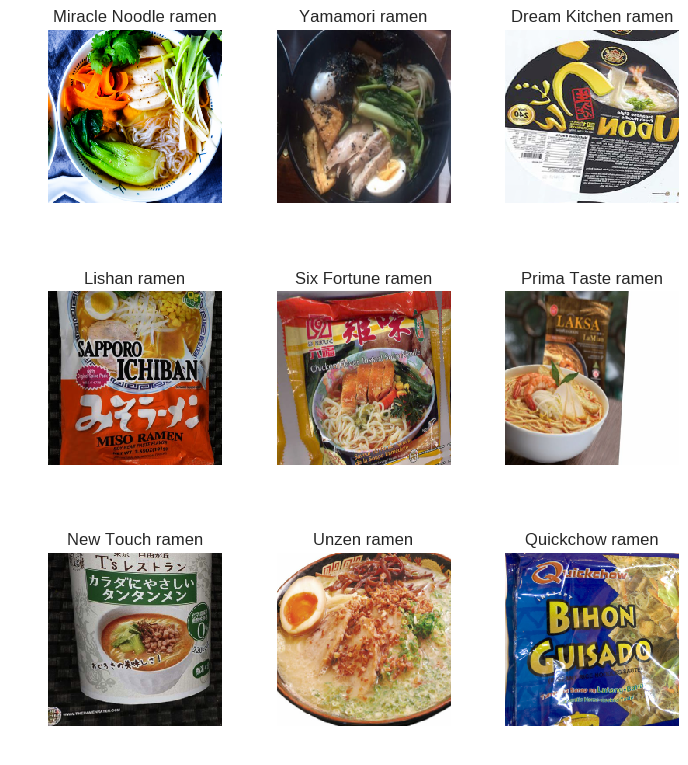

In [226]:
data.show_batch(rows=3, figsize=(7, 8))